<a href="https://colab.research.google.com/github/matthewbegun/MXN500/blob/main/MXN500_2024_SOL_09_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MXN500 Workshop 9 - Polynomial Regression (Solutions)


This week we will learn linear regression by examining the `dengue` data. This workshop gives experience in the main concepts presented this week - how to examine polynomial relationships in data. We will investigate model assumptions and perform model comparisons to check whether the polynomial model is superior to the linear model.


In [ ]:
#@title Imports
install.packages("pacman")
pacman::p_load(tidyverse, broom)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# Activity 1 -- Thinking about non-linear relationships


In this workshop, we will learn about regression and its use as a method for investigating patterns in data, namely the relationship between the viral load of Dengue Fever and the number of days a person has been infected.

The scientific aims for today's workshop are:

1.  Investigate potential non-linear relationships in data.
2.  Assess the goodness of fit of the linear regression
3.  Investigate the assumptions of linearity, homogeneity of variance and normality of residuals.
4.  Perform model choice to determine which of a number of competing models is most appropriate


**Exercise:** Discuss within your group what sort of relationships may not be able to be modelled with a straight line of best fit. Pick one to discuss further.

-   Do you expect the line of best fit (or curve of best fit) for such to have some maximum or minimum, like an optimisation problem?
-   If there's no clear maximum or minimum, is this a model of growth or decay rates?
-   Does the solution continue to go off to infinity or does it reach some asymptote (either a max or min)?
-   Does it display oscillatory behaviour?
-   Do you believe a polynomial model is appropriate, or would it be better use a model featuring exponential and/or sinusoidal functions?
-   Are we describing a general trend (emulation) or is there a specific relationship that we are modeling (e.g. effect of gravity in a vacuum)?


**Answer:**

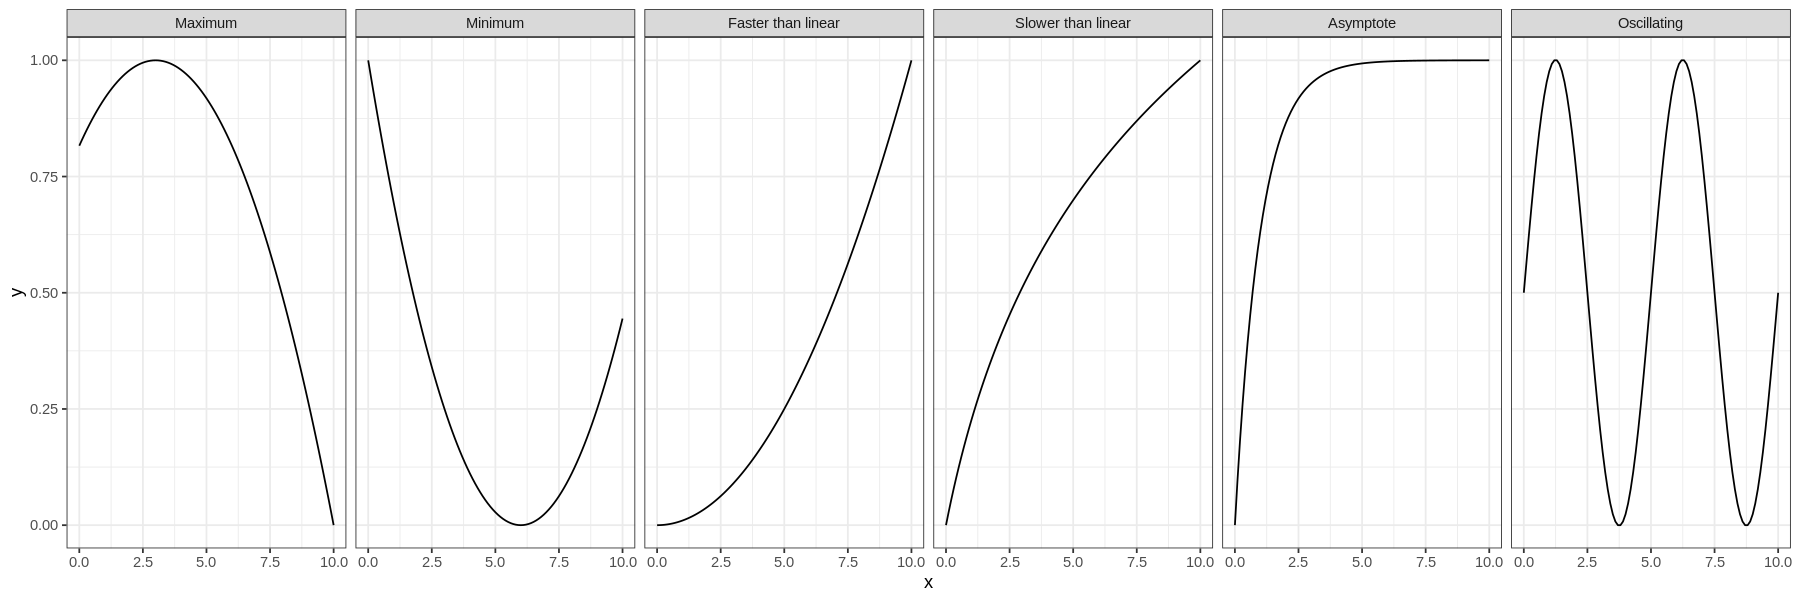

In [ ]:
#@title Examples of non-linear function types
options(repr.plot.width=15, repr.plot.height=5, repr.plot.pointsize=24)
df <- data.frame(x= seq(0,10,by=0.1)) %>%
  mutate(Maximum = -(x-3)^2,
         Minimum = (x-6)^2,
         `Faster than linear` = x^2,
         `Slower than linear` = log(x+2),
         Asymptote = 1 - exp(-x),
         Oscillating = sin(2*pi*x/5))

df %>%
  gather(key, y, -x) %>%
  mutate(key = fct_inorder(key)) %>%
  group_by(key) %>%
  mutate(y = y - min(y),
         y = y/max(y)) %>%
  ggplot(data=., aes(x=x, y=y)) +
  geom_line()+
  facet_grid(. ~ key) +
  theme_bw()


**Room discussion:** Have your group's spokesperson tell the room what phenomenon you discussed and what sort of relationship you expect explains it. What is the outcome variable? What is the explanatory variable?

**Answer:**

# Activity 2 -- Visualisation


Dengue fever is a disease caused by the dengue virus, prevalent in tropical regions around the world and spread to humans by the *aedes aegypti* mosquito, with approximately 300 million cases reported worldwide each year (Bhatt et al. 2013). The virus has an incubation period where an infected human does not exhibit symptoms for a number of days after the initial infection has occurred. During this incubation period, a mosquito feeding on the infected human may become infected and continue spreading the disease before the patient is either hospitalised due to the fever, or is at least quarantined at home where they cannot spread the disease to the wider public.

We can assess how sick a person is, and hence how infectious they are, by measuring the viral load in the blood, the number of copies of dengue virus ribonucleic acid (RNA) per mL of blood serum in their bloodstream. The data in the dengue file on Canvas contains pairs of times since the patient first presented, $t$, and viral load, $v$, for patient 104 in a study of the dynamics of dengue fever (Clapham et al. 2016).

**Exercise:** Download the `dengue.csv` dataset from Canvas, make a script with a comment header and load your data into R.

In [ ]:
(df <- read_csv('dengue.csv'))

Rows: 12 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (3): SUBJECT ID, Load, Days

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


SUBJECT ID,Load,Days
<dbl>,<dbl>,<dbl>
104,6.97e+09,0.0000000
104,4.81e+09,0.4986111
104,3.15e+09,1.0076389
104,1.11e+09,1.5041667
104,5.24e+08,1.9986111
104,1.91e+08,2.5006944
104,5.66e+07,2.9986111
104,7.43e+06,3.5013889
104,9.21e+05,4.0020833


**Exercise:** Plot the viral load against time.

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


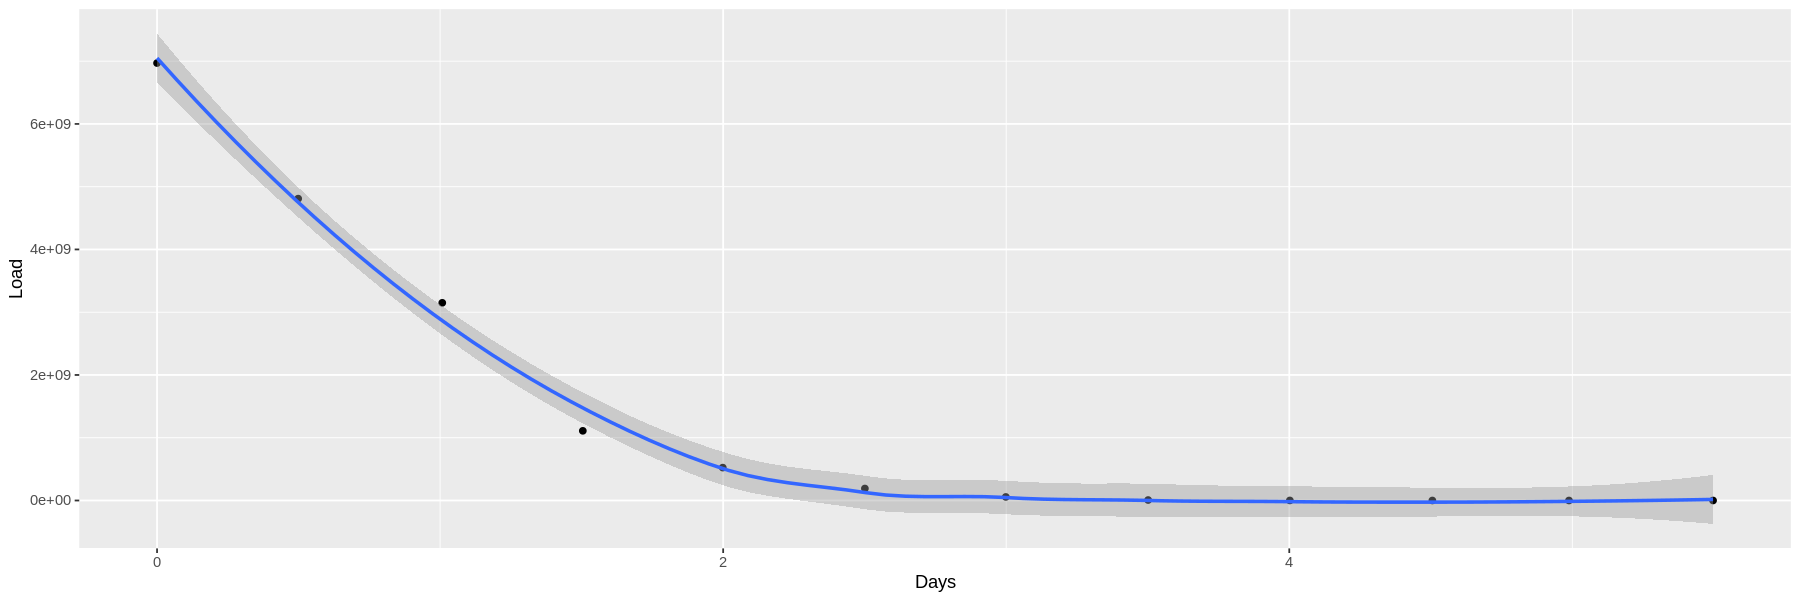

In [ ]:
ggplot(df, aes(x = Days, y = Load)) +
  geom_point() +
  geom_smooth()


**Exercise:** Plot the viral load against time, showing a relationship with `geom_smooth()`, using a logarithmic scale on the $y$ axis.


`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


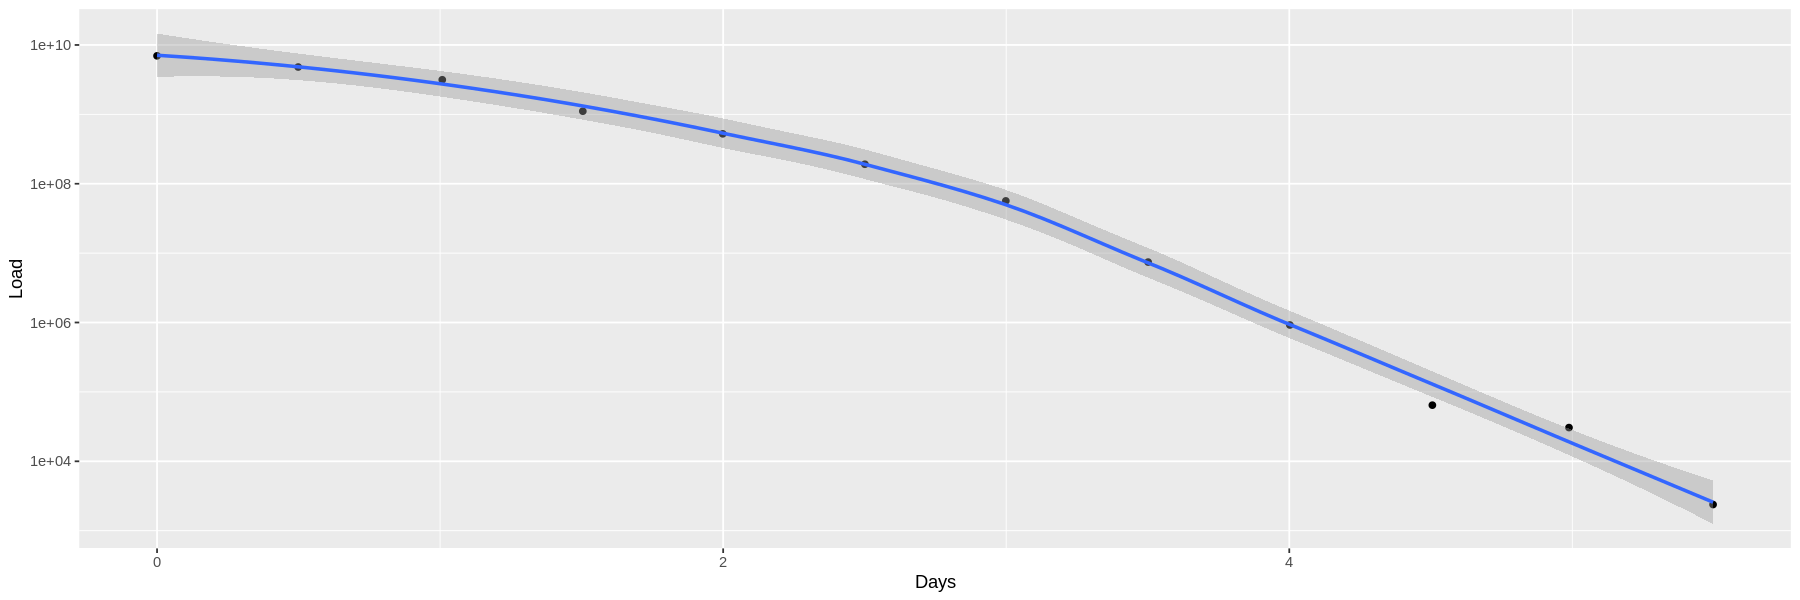

In [ ]:
ggplot(df, aes(x = Days, y = Load)) +
  geom_point() +
  scale_y_log10() +
  geom_smooth()

**Exercise:** Does it look like there's a linear relationship between Days and `log(Load)`? What does the relationship look like?


**Answer:** This does not look like a linear relationship, but perhaps a quadratic relationship. Note: a quadratic relationship can be modelled using linear regression (there is a difference between linear relationship and linear regression).

# Activity 3 -- Linear Regression


## Fitting a model


Let's begin by investigating a straight line model for this data. The general form of a linear regression with a continuous outcome variable, $Y$, and a continuous explanatory variable, $X$, is

$$
y_i = \beta_0 + \beta_1 x_i + \varepsilon_i, \quad \varepsilon_i \sim N(0, \sigma^2)
$$

**Exercise:** Fit a linear regression model that shows how `log(Load)` varies according to `Days`. Include a table of parameter estimates and their 95% confidence intervals.

In [ ]:
lm_dengue <- lm(data = df, log(Load) ~ Days)
tidy(lm_dengue, conf.int = TRUE, conf.level = 0.95) %>%
    select(term, estimate, conf.low, conf.low, conf.high, p.value)
# summary(lm_dengue)

term,estimate,conf.low,conf.high,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),24.58181,23.104157,26.059466,4.862187e-12
Days,-2.77545,-3.230663,-2.320237,9.024408e-08


## Residuals


We don't want to know just how well the model has fit the data, but also the nature of the unexplained variability. We now turn to look at the residuals.

One of the assumptions of linear regression is that the residuals are normally distributed with a mean of zero and a constant variance.

### Variation of residuals


**Exercise:** Use the `fortify()` function from ggplot2 to create a data frame with all we need to analyse the residuals. Make a scatter plot of the residuals, $\varepsilon_i$, `.resid`, against the fitted values, $\hat{y}_i$, `.fitted`.

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


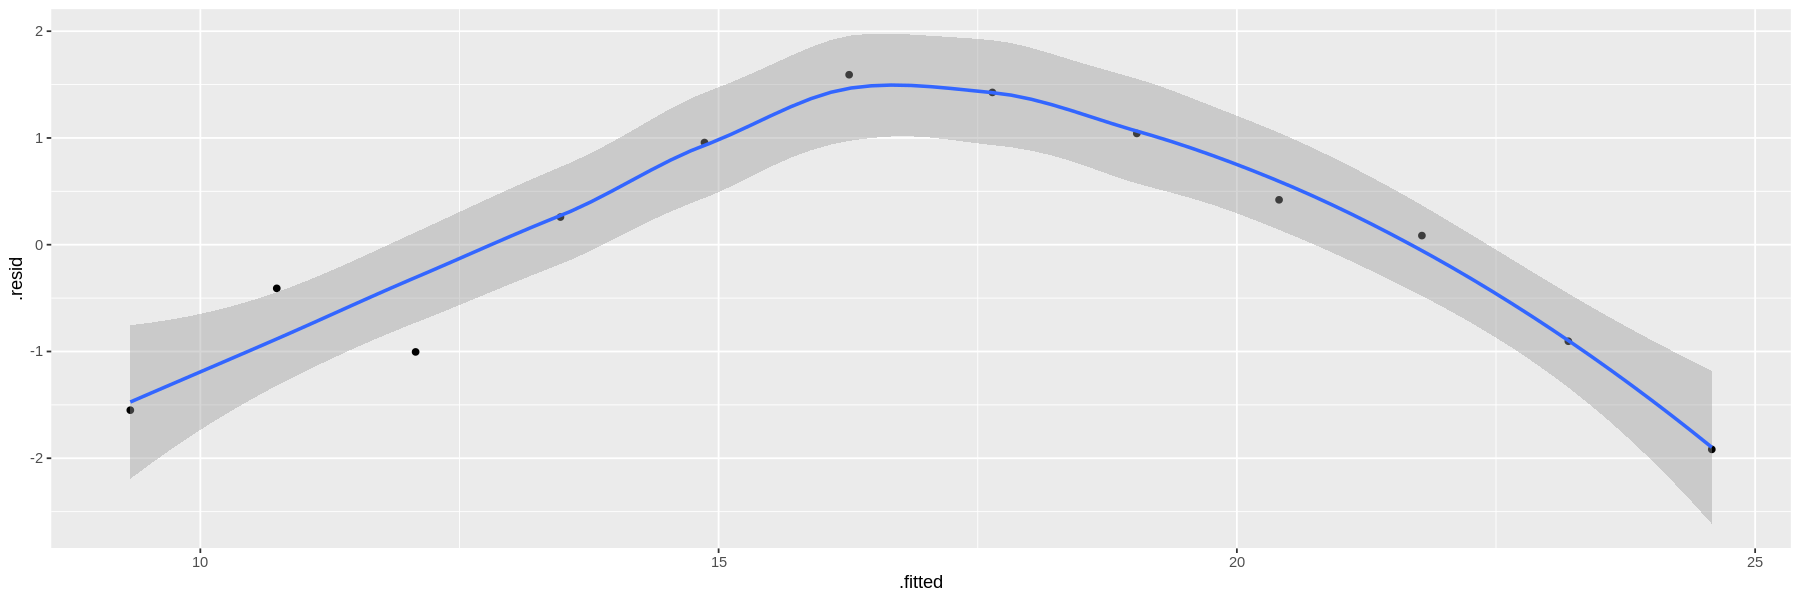

In [ ]:
lm_fort <- fortify(lm_dengue)

ggplot(lm_fort, aes(x = .fitted, y = .resid)) +
  geom_point() +
  geom_smooth()

**Exercise:** Discuss any trends you see in the scatter plot of the residuals.

**Answer:** There appears to be distinct curvature in these residuals.


**Exercise:** Make a scatter plot of the residuals against the `Days` column in your fortified data frame.


`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


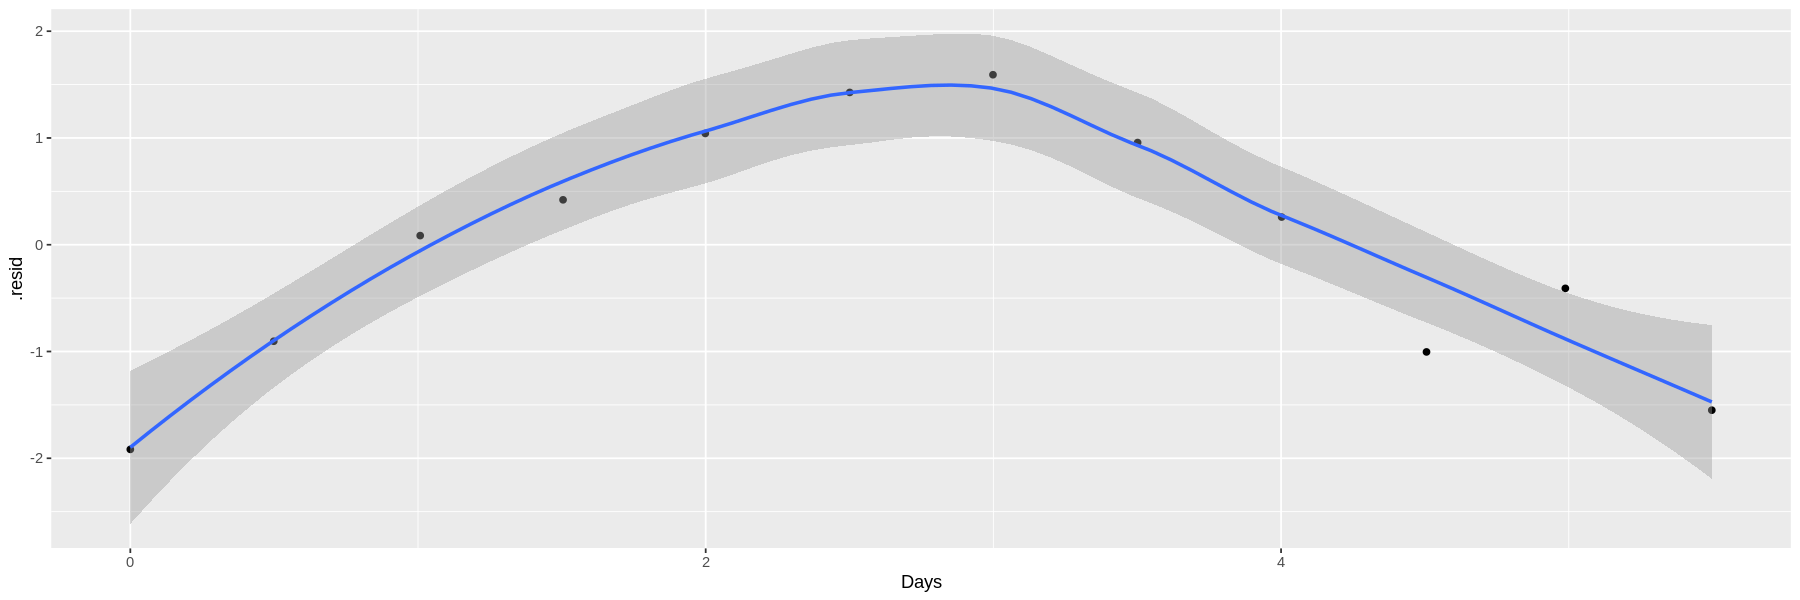

In [ ]:
ggplot(lm_fort, aes(x = Days , y = .resid)) +
  geom_point() +
  geom_smooth()

**Exercise:** Modify the following code to generate a `qqplot` of your residuals.


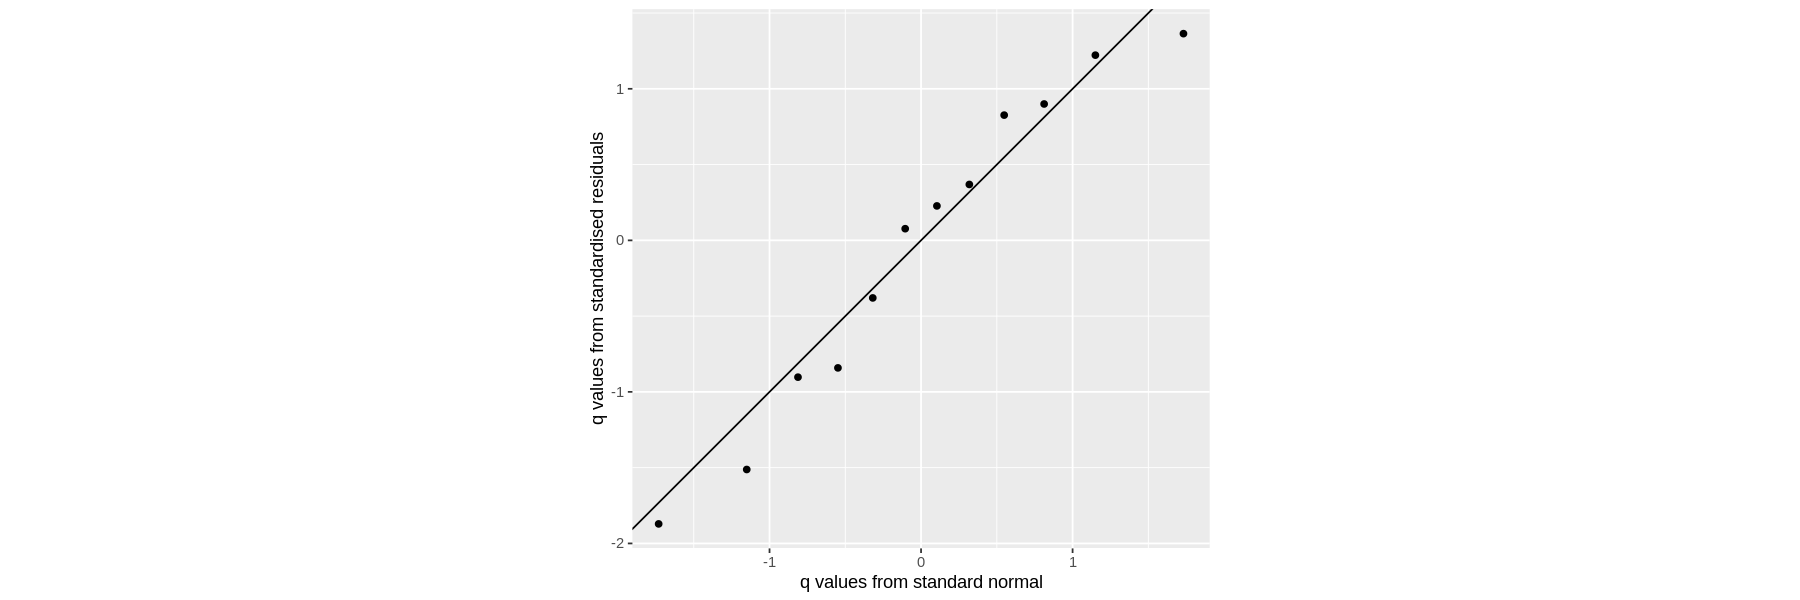

In [ ]:
ggplot(data = lm_fort, aes(sample = .stdresid)) +
  stat_qq() +
  geom_abline(intercept = 0, slope = 1) +
  coord_equal() +
  labs(
    x = "q values from standard normal",
    y = "q values from standardised residuals"
  )

**Exercise:** Discuss any trends you see in the scatter plots of the residuals.


**Answer:** There still appear to be distinct curvature in the residuals. As far as we can tell, the residuals appear to be normally distributed.


We will now consider whether a quadratic model may be more appropriate.


# Activity 4 -- Linear regression with a polynomial


Over the course of an infection, we may be able to model the logarithm (base 10) of the viral load as following a quadratic equation. This is the same as assuming that the viral load, $v(t)$, looks like

$$
v(t) = A \, 10^{- \lambda \left(t - t_0\right)^2  }
$$

where $A>0$ indicates how tall the peak is at $t = t_0$ and the shape parameter $\lambda >0$ describes how narrow the peak is.

Taking logarithms of both sides we arrive at the model

$$
\log_{10}\left(v\right) = \log_{10} (A) -\lambda t^2 + 2\lambda t t_0 - \lambda t_0^2
$$

After a few substitutions we can write this as

$$
\log_{10}\left(v\right) = \beta_0 + \beta_1 t + \beta_2 t^2
$$

We wish to determine what the value of $t_0$ is, i.e. how long before the patient initially presented, and had their viral load taken, that they were at peak viral load. This will involve estimating the parameters of the quadratic model, $\beta_0, \beta_1, \beta_2$ and then manipulating the equation to find when it is at its maximum.

**Exercise:** Make a new column in the data frame that contains the log (base 10) of the viral load. Fit a polynomial line of best fit to the data, using the `raw=T` argument to `poly()` so that we end up with the actual values of the unknown parameters. The reason R does not do this by default is for issues of numerical stability. Make a table below showing the estimates of the intercept, effect of time, and effect of the square of time.


In [ ]:
df <- mutate(df, LogLoad = log(Load))
lm_dengue2 <- lm(data = df, LogLoad ~ poly(Days, 2, raw = T))

tidy(lm_dengue2, conf.int = TRUE, conf.level = 0.95) %>%
    select(term, estimate, conf.low, conf.high, p.value)


term,estimate,conf.low,conf.high,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),22.7471963,22.0500461,23.44434661,7.777143e-14
"poly(Days, 2, raw = T)1",-0.5736551,-1.1631424,0.01583226,5.521429e-02
"poly(Days, 2, raw = T)2",-0.4005723,-0.5039092,-0.29723543,1.055678e-05


## Residuals


Now that we've produced a quadratic model for our data, let's check these residuals.



### Variation of residuals



**Exercise:** Use the `fortify()` function from ggplot2 to create a data frame with all we need to analyse the residuals. Make a scatter plot of the residuals, $\varepsilon_i$, `.resid`, against the fitted values, $\hat{y}_i$, `.fitted`.


`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


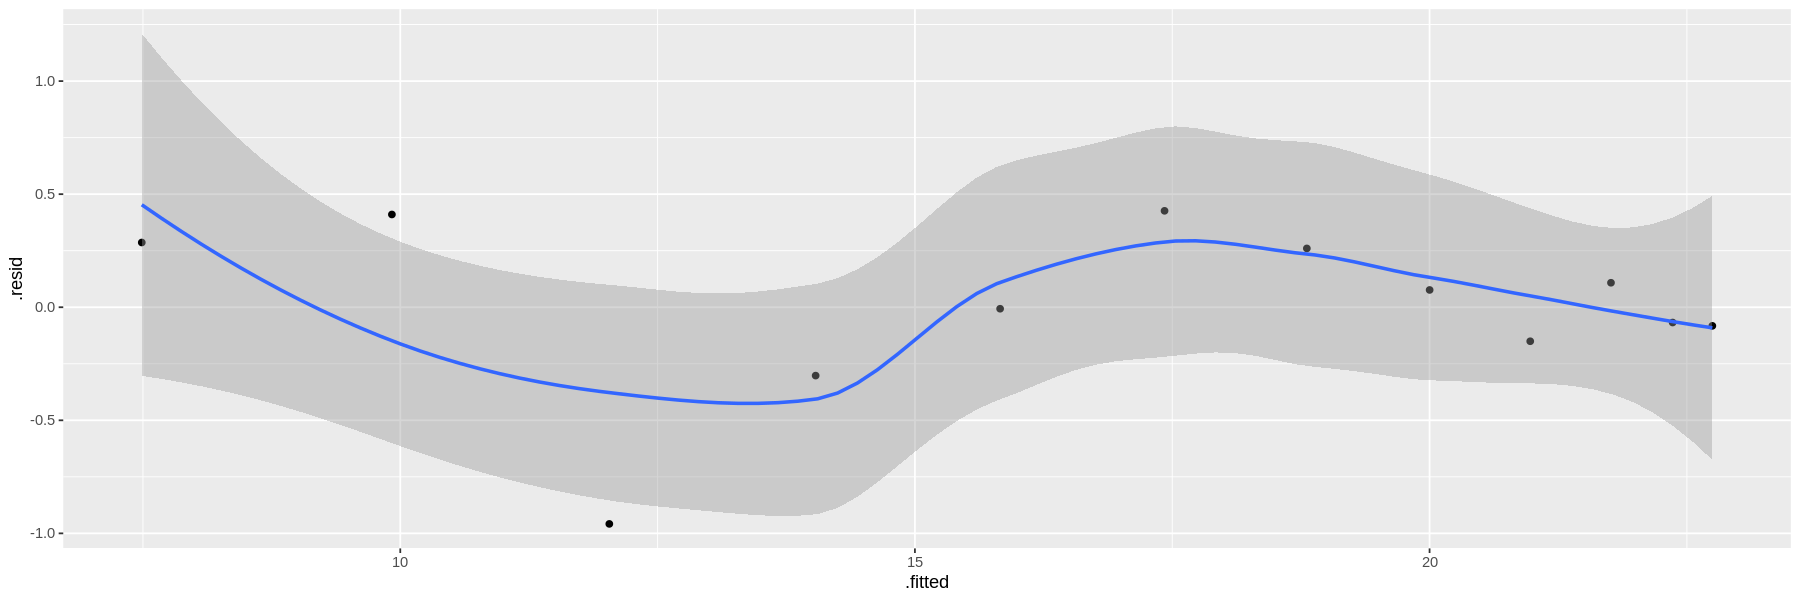

In [ ]:
lm_fort2 <- fortify(lm_dengue2)

ggplot(lm_fort2, aes(x = .fitted, y = .resid)) +
  geom_point() +
  geom_smooth()

**Exercise:** Make a scatter plot of the residuals against the `Days` column in your fortified data frame.


`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


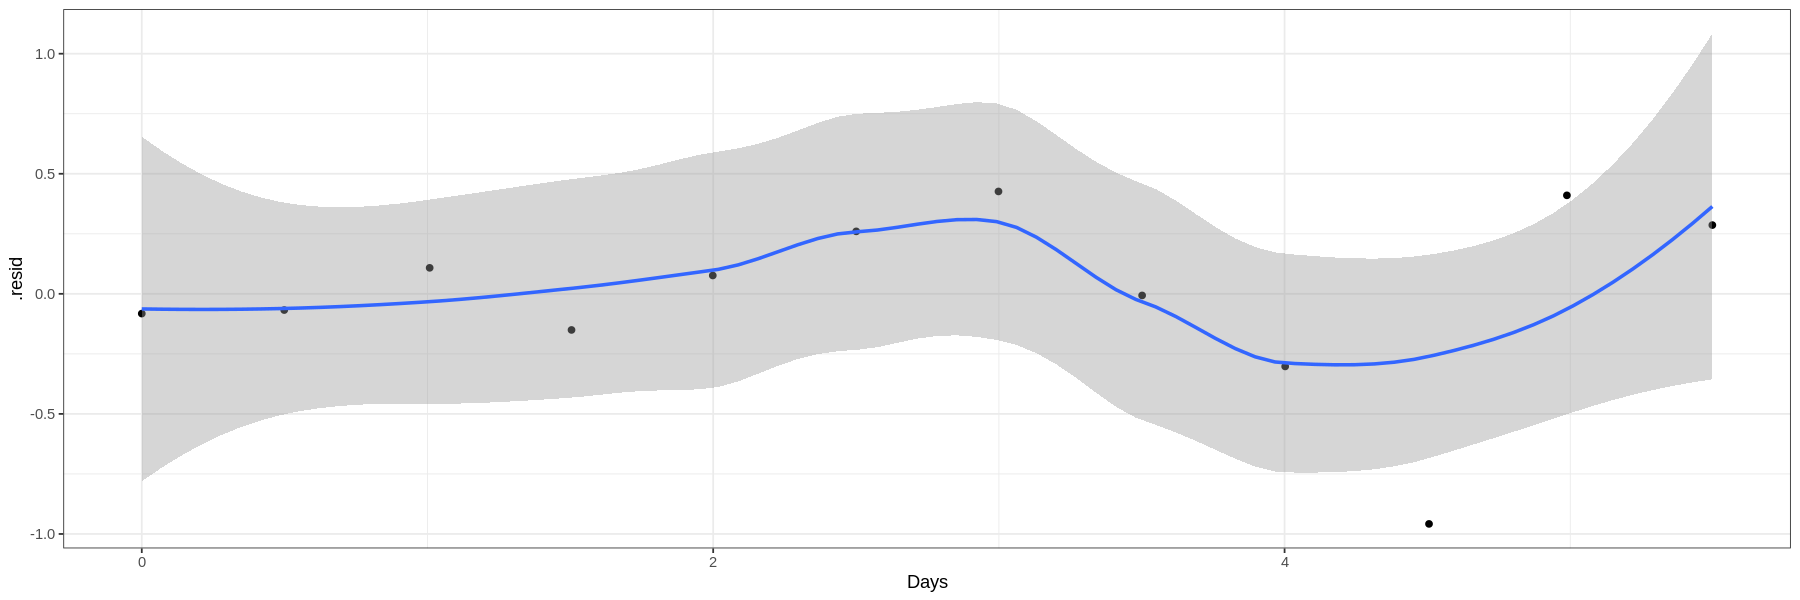

In [ ]:
ggplot(data = lm_fort2, aes(x = `poly(Days, 2, raw = T)`[, 1], y = .resid)) +
  geom_point() +
  theme_bw() +
  xlab("Days") +
  geom_smooth()

**Exercise:** Create a `qqplot` of the residuals.


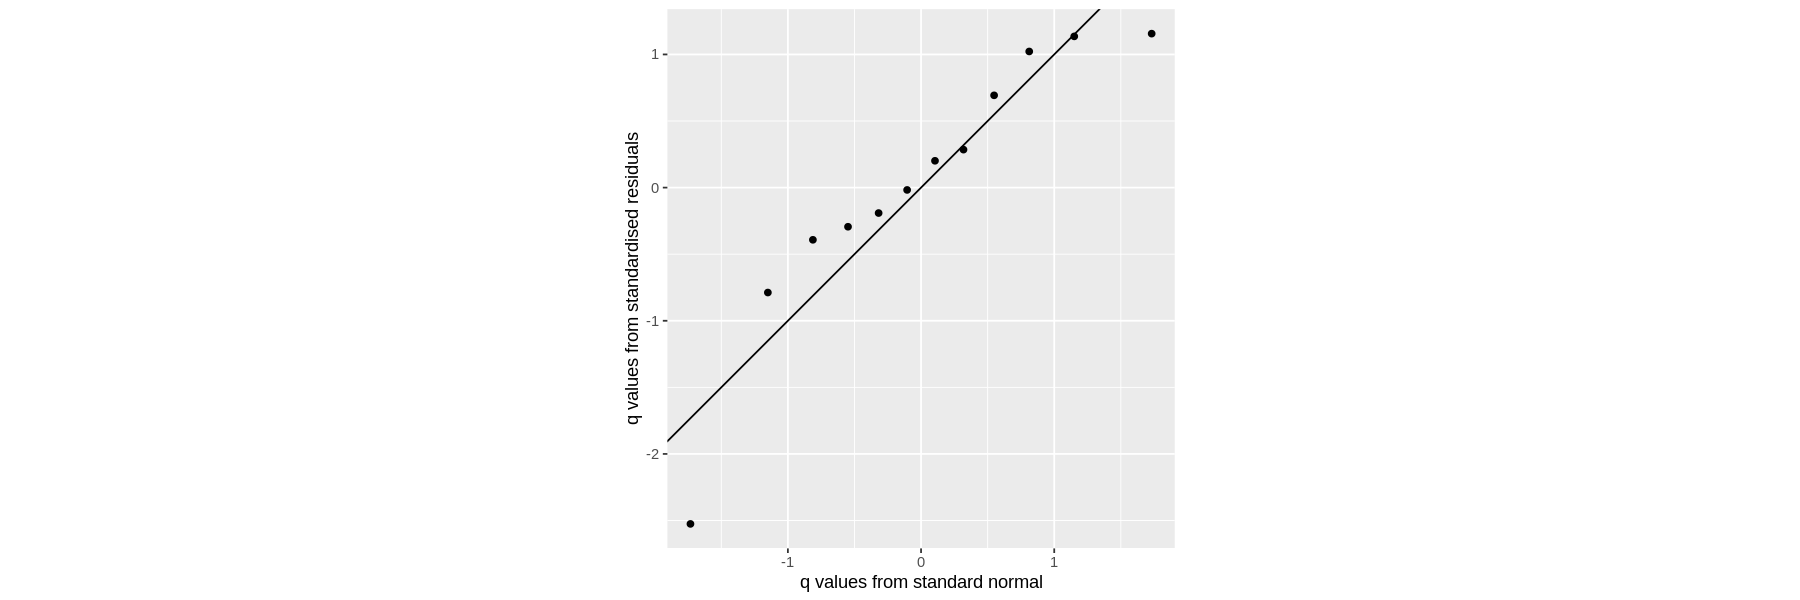

In [ ]:
ggplot(data = lm_fort2, aes(sample = .stdresid)) +
  stat_qq() +
  geom_abline(intercept = 0, slope = 1) +
  coord_equal() +
  labs(
    x = "q values from standard normal",
    y = "q values from standardised residuals"
  )

**Exercise:** Discuss any trends you see in the scatter plots of the residuals.


**Answer:**
It appears that we have removed the unexplained curvature in the residuals. There is some evidence that the residuals may not be normally distributed, however this may be due to a small sample size.


**Exercise:** Based on the residuals you have observed here, and those you saw for the linear model, which model appears to satisfy the assumptions of linear regression?



**Answer:** The residuals from the quadratic model appear to satisfy the assumptions of linear regression.

# Activity 5 - Prediction


**Exercise:** Differentiate $\log_{10} v$ with respect to time, substitute in your values of $\beta_0, \beta_1, \beta_2$, set the derivative equal to zero and solve for $t$ to obtain $t_0$

$$
\begin{aligned}
\log_{10} \left(v\right) = & \, \beta_0 + \beta_1 t + \beta_2 t^2 &\, \\
\frac{\mathrm{d}\log_{10} v}{\mathrm{d}t} = & \, \beta_1 + 2 \beta_2 t & \,= 0
\end{aligned}
$$



**Answer:** $t_0 = -\beta_1 / 2\beta_2 =  -0.72$ days.

In [ ]:
beta <- tidy(lm_dengue2) %>%
  select(estimate)

round(-beta[2,]/(2*beta[3,]),2)

estimate
<dbl>
-0.72


**Exercise:** Make a data frame containing only the value of $t_0$ as a column called `Days` and predict the value of the peak log viral load at $t_0$, along with a 95% confidence interval. Undo the log transformation (with `10^(.)`) and complete the following sentence:



In [ ]:
beta_1 <- beta$estimate[2]
beta_2 <- beta$estimate[3]

(newdata <- data.frame(Days = -beta_1 / (2 * beta_2)))

(max_Load <- predict(object = lm_dengue2, newdata = newdata, interval = "conf", level = 0.95))


Days
<dbl>
-0.7160444


,fit,lwr,upr
1,22.95258,21.8376,24.06755


**Answer:** Peak viral load was observed $0.72$ days prior to first measurement, having value $9.0 \times 10^{22}$ copies/mL (95% CI: $6.9 \times 10^{21},1.2 \times 10^{24}$).



In [ ]:
# this is the value of t_0
round(newdata$Days,2)

# these are the estimates in log scale
round(max_Load[1],2)
round(max_Load[2],2)
round(max_Load[3],2)

# these are the estimates in n/mL
signif(10^(max_Load[1]),2) # add the `.0` to this one to keep it consistent
signif(10^(max_Load[2]),2)
signif(10^(max_Load[3]),2)


[1] -0.72

[1] 22.95

[1] 21.84

[1] 24.07

[1] 9e+22

[1] 6.9e+21

[1] 1.2e+24

**Exercise:** Make a data frame with column `Days` taking on the values $t = \{ -5, -4.5, -4,\ldots, 5.5, 6 \}$, predict the log viral load for these times and their 95% confidence interval; plot these values with your log viral load data.


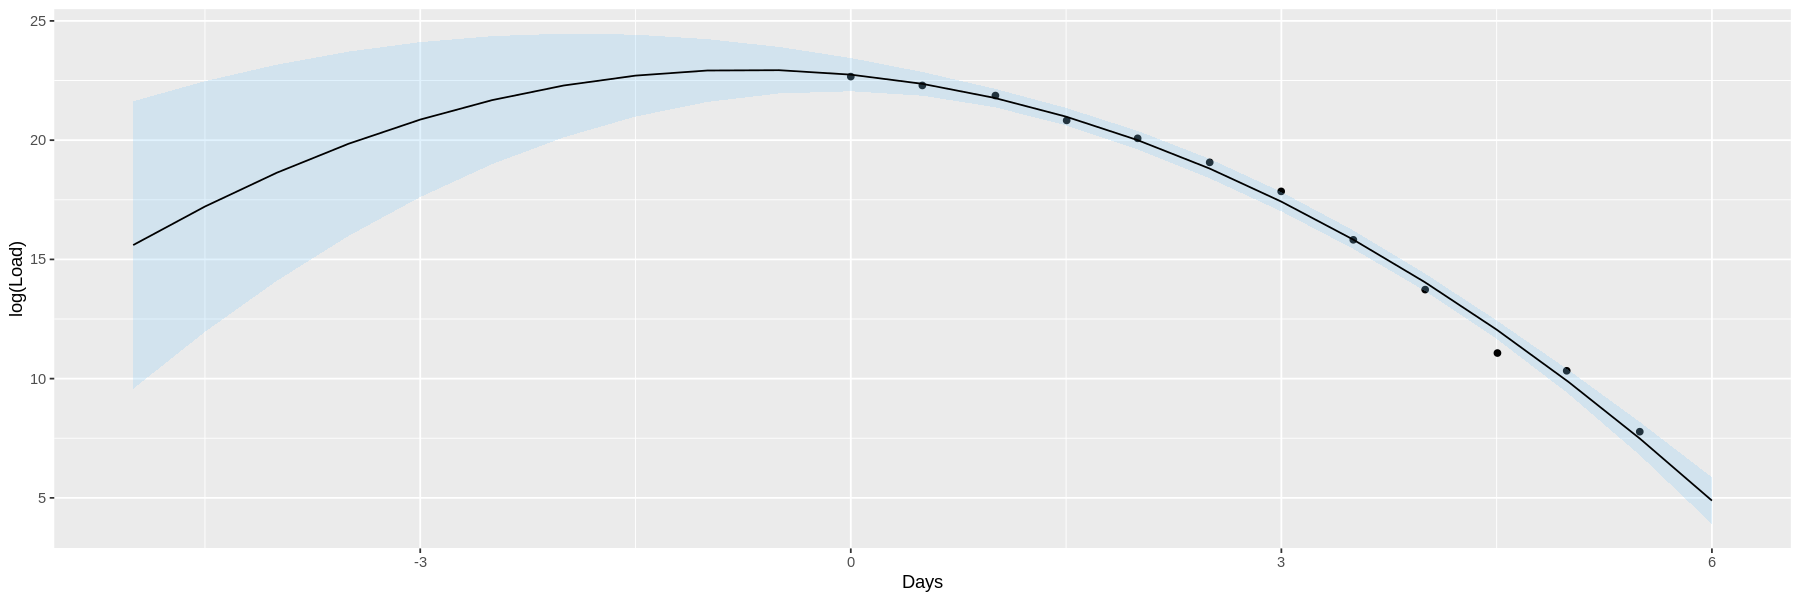

In [ ]:
newdata <- data.frame(Days = seq(-5, 6, by = 0.5))

pred_load <- data.frame(predict(object = lm_dengue2, newdata = newdata, interval = "conf", level = 0.95))

pred_load <- bind_cols(newdata, pred_load)

ggplot(data = df, aes(x = Days)) +
  geom_point(aes(y = log(Load))) +
  geom_ribbon(
    data = pred_load,
    aes(ymin = lwr, ymax = upr),
    fill = "lightskyblue",
    colour = NA,
    alpha = 0.25
  ) +
  geom_line(data = pred_load, aes(y = fit))

**Exercise:** Discuss why there is so much uncertainty in the relationship between viral load and time for $t < 0$



**Answer:** Recall, prediction and confidence intervals get wider as we get further from $\overline{x}$.

**Exercise:** Do you expect the quadratic relationship to hold outside the range of the data? Why or why not? Do you expect the linear relationship to hold outside the range of the data? Why or why not?



**Answer:** It would be unreasonable to expect the quadratic or linear relationships to hold outside of the range of the data. This is as these models do not incorporate the non-negative, finite, nature of viral load.

# Activity 6 - Model comparison


We wish to determine whether or not we need to use a quadratic model for this data, or whether a linear relationship is enough.

**Exercise:** What are the $R^2$ values for each model? Does the quadratic model seem to do much better?



**Answer:** The first model has an $R^2$ of $0.9486$ whilst the quadratic model has an $R^2$ of $0.9946$. The second model does appear to explain a greater amount of variability.

In [ ]:
round(summary(lm_dengue)$r.squared,4)
round(summary(lm_dengue2)$r.squared,4)

# summary(lm_dengue)
# summary(lm_dengue2)


[1] 0.9486

[1] 0.9946

**Exercise:** Using `anova()`, perform an $F$ test on your two models to test the null hypothesis that the quadratic model explains as much variation in the data as the straight line model does.



**Answer:** There is very significant evidence against the hypothesis that the models explain the same amount of variability in the data, in favour of the alternative hypothesis, that the quadratic model explains a greater deal of uncertainty.

In [ ]:
# ANOVA didn't play nicely with LogLoad / log(Load), quick fix:
lm_dengue3 <- lm(data = df, log(Load) ~ poly(Days, 2, raw = T))

anova(lm_dengue, lm_dengue3)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,10,14.892019,NA,NA,NA,NA
2,9,1.560376,1,13.33164,76.89477,1.055678e-05


# Activity 7 -- Interpretation


**Exercise:** Discuss how and how well you believe time affects viral load.



**Answer:** Initially, your body is not able to combat the virus and the viral load increases in an exponential manner. Your body learns how to combat the virus and becomes better and better. As such, the viral load peaks quickly and then decreases before the patient is 'healthy'.

**Exercise:** What statistical evidence do you have for concluding which of the two models is most appropriate for explaining the variation in the data?



**Answer:** The p-value of the anova allows us to reject the null hypothesis that both models explain the same amount of variability in favour of the alternative hypothesis, that the full model explains a greater deal of uncertainty. Additionally, the $R^2$ value is higher for the quadratic model.

# Further reading


Today we looked at regression methods for polynomial lines of best fit. If we have a specific functional form to fit, such as using the solution to a differential equation as a regression model, we will generally need to go into non-linear regression. As mentioned, polynomials still fit into the framework of linear regression because we treat $y$ as a linear combination of $1, x, x^2, \ldots$ for however high the order of the polynomial we use. That is, we fit a model that looks like

$$
\hat{y} = \beta_0 + \beta_1 x + \beta_2 x^2 + \ldots
$$

If we want to solve an asymptotic model of growth, we end up needing to solve something that looks like

$$
\hat{y} = A + \left(y_0 - A \right) e^{-rx}
$$

for baseline $y_0$, asymptotic height $A$, and rate parameter $r$. Such a model can be fit with `SSasymp()` and `nls()` for solving non-linear models. This model is non-linear because we don't have a known multiple of each of $A, y_0, r$ that when we add together we recover $\hat{y}$.

Sometimes we are fortunate enough that we can transform our equation from a non-linear one to a linear one, as in the dengue example. Care must be taken with these when dealing with predictions and model diagnostics, as transforming the equation also alters the assumptions we make about the distribution of the errors. For example, additive errors on the log scale become multiplicative errors when we undo the transformation.

More detail is available in Bates and Watts (1988) and Chapter 10 of Chambers and Hastie (1992), although these are somewhat old. Environmental science students may wish to look at Chapter 9, in particular, in Bolker (2008), and Zuur et al. (2009).

# References


- Bates, Douglas M, and Donald G Watts. 1988. “Nonlinear Regression: Iterative Estimation and Linear Approximations.” *Nonlinear Regression Analysis and Its Applications*. Wiley Online Library, 32–66.
- Bhatt, Samir, Peter W. Gething, Oliver J. Brady, Jane P. Messina, Andrew W. Farlow, Catherine L. Moyes, John M. Drake, et al. 2013. “The Global Distribution and Burden of Dengue.” Nature 496 (7446). Springer *Nature*:504–7. https://doi.org/10.1038/nature12060.
- Bolker, Benjamin M. 2008. *Ecological Models and Data in r*. Princeton University Press.
- Chambers, J. M., and T. J. Hastie, eds. 1992. *Statistical Models in s*. Wadsworth & Brooks/Cole.
- Clapham, Hannah E, Than Ha Quyen, Duong Thi Hue Kien, Ilaria Dorigatti, Cameron P Simmons, and Neil M Ferguson. 2016. “Modelling Virus and Antibody Dynamics During Dengue Virus Infection Suggests a Role for Antibody in Virus Clearance.” *PLOS Computational Biology* 12 (5). Public Library of Science (PLoS):e1004951. https://doi.org/10.1371/journal.pcbi.1004951.
- Zuur, Alain F., Elena N. Ieno, Neil J. Walker, Anatoly A. Saveliev, and Graham M. Smith. 2009. “Limitations of Linear Regression Applied on Ecological Data.” In *Mixed Effects Models and Extensions in Ecology with r*, 11–33. Statistics for Biology and Health. Springer New York. https://doi.org/10.1007/978-0-387-87458-6_2.